<a href="https://colab.research.google.com/github/annab0503/DS2002/blob/main/Assignments/CSV_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Reading the CSV File:**

Load the provided CSV file into a pandas DataFrame.

In [12]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Import dependencies
import pandas as pd

# Load the regular season and playoff data (semicolon-separated and encoding handled)
acc_players_2324 = pd.read_csv('/content/drive/MyDrive/2024 Fall/DS 2002/CSV Files/acc_players-2324F.csv', header=1)

Display the first 5 rows of the DataFrame to understand the structure of the data.

In [7]:
# Display the first 5 rows of each dataset
acc_players_2324.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


**2. Basic Analysis**

Calculate the total points scored by all players combined.

In [8]:
total_points = acc_players_2324['PTS'].sum()
print(f"Total points scored by all players: {total_points}")


Total points scored by all players: 38411


Find the player who has played the most minutes (MP).

In [9]:
# Find the player who has played the most minutes (MP).
most_minutes = acc_players_2324.loc[acc_players_2324['MP'].idxmax()]

print(f"The player with the most minutes played is: {most_minutes['Player']}")

The player with the most minutes played is: Casey Morsell


Identify the top 5 players in terms of total rebounds (TRB).

In [10]:
# Identify the top 5 players in terms of total rebounds (TRB).

# Sort the DataFrame by total rebounds (TRB) in descending order and get the top 5
top_5_rebounders = acc_players_2324.sort_values('TRB', ascending=False).head(5)

# Display the top 5 players
print("Top 5 Players in terms of Total Rebounds:")
print(top_5_rebounders[['Player', 'TRB']])


Top 5 Players in terms of Total Rebounds:
              Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309


**3. Player Filtering**

Create a new DataFrame containing only players who played more than 500 minutes.

In [16]:
players_500 = acc_players_2324[acc_players_2324['MP'] > 500]

# Display the new DataFrame
print("Players who played more than 500 minutes:")
players_500.head()


Players who played more than 500 minutes:


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9
5,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.540,0.544,0.400,0.781,24.6,6.1,8.9
7,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,...,70,43,486,0.443,0.487,0.310,0.754,23.4,4.9,10.5
9,10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,...,26,58,384,0.434,0.459,0.420,0.842,14.9,2.2,3.3


From this filtered DataFrame, determine the player with the highest total assists (AST).

In [18]:
highest_assists = players_500.loc[players_500['AST'].idxmax()]

print(f"The player with the highest total assists and played more than 500 minutes is: {highest_assists['Player']}")


The player with the highest total assists and played more than 500 minutes is: Reece Beekman


Who are the top 3 Assist Leads in the League?

In [19]:
# Sort the DataFrame by total assists (AST) in descending order and get the top 3
assist_leaders = acc_players_2324.sort_values('AST', ascending=False).head(3)

# Display the top 3 players
print("Top 3 Assist Leaders in the League:")
print(assist_leaders[['Player', 'AST']])


Top 3 Assist Leaders in the League:
             Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150


Who are the top 3 Shot Blockers?

In [20]:
# Sort the DataFrame by total blocks (BLK) in descending order and get the top 3
block_leaders = acc_players_2324.sort_values('BLK', ascending=False).head(3)

# Display the top 3 players
print("Top 3 Shot Block Leaders in the League:")
print(block_leaders[['Player', 'BLK']])


Top 3 Shot Block Leaders in the League:
            Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


**4. School-Based Analysis**

Group the players by School and calculate the total points scored by each school.

In [29]:
school_points = acc_players_2324.groupby('School')['PTS'].sum()

# Display the total points scored by each school
print("Total points scored by each school:")
school_points

Total points scored by each school:


,PTS
School,
Boston College,2667
Clemson,2785
Duke,2830
Florida State,2526
Georgia Tech,2272
Louisville,2304
Miami (FL),2424
NC State,3101
North Carolina,3032


Group the players by School and calculate the total assists (AST) for each team.

In [31]:
school_assists = acc_players_2324.groupby('School')['AST'].sum()

# Display the total assists for each school
print("Total assists by each school:")
school_assists

Total assists by each school:


,AST
School,
Boston College,509
Clemson,533
Duke,551
Florida State,406
Georgia Tech,425
Louisville,356
Miami (FL),454
NC State,536
North Carolina,536


Sort the schools by total points scored and display the top 3 schools.

In [34]:
top_points = school_points.sort_values(ascending=False).head(3)
print("Top 3 schools by total points scored:")
top_points


Top 3 schools by total points scored:


,PTS
School,
NC State,3101
North Carolina,3032
Duke,2830


**5. Extra Credit (Bonus):**

Create a bar chart showing the top 5 players by total points scored (PTS).

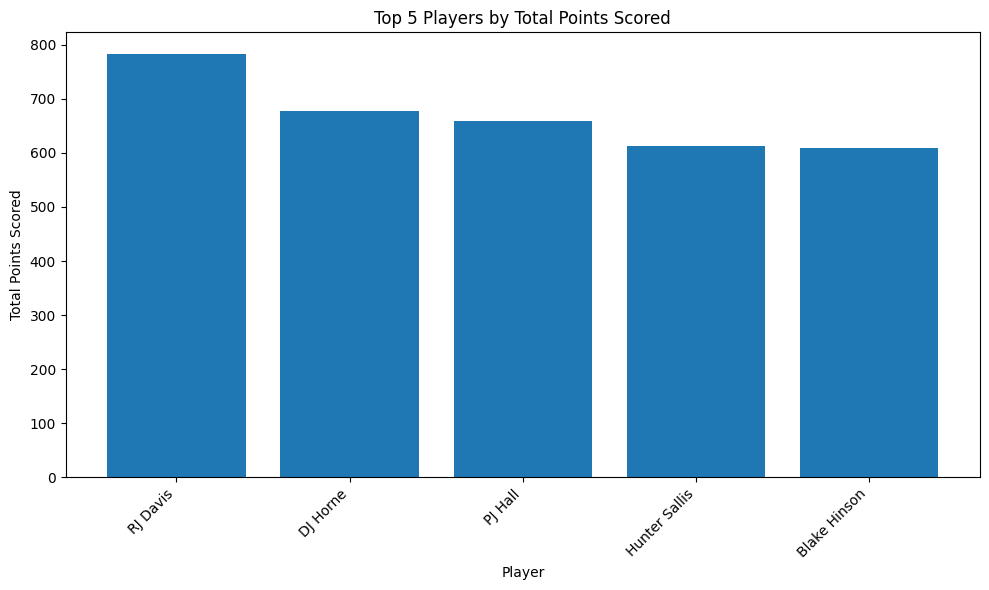

In [35]:
# Import dependencies
import matplotlib.pyplot as plt

# Sort the DataFrame by total points (PTS) in descending order and get the top 5
top_5_scorers = acc_players_2324.sort_values('PTS', ascending=False).head(5)

# Extract player names and total points
player_names = top_5_scorers['Player']
player_points = top_5_scorers['PTS']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(player_names, player_points)
plt.xlabel('Player')
plt.ylabel('Total Points Scored')
plt.title('Top 5 Players by Total Points Scored')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Correlation: Investigate whether there is any correlation between a player's field goal
percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
correlation coefficient.

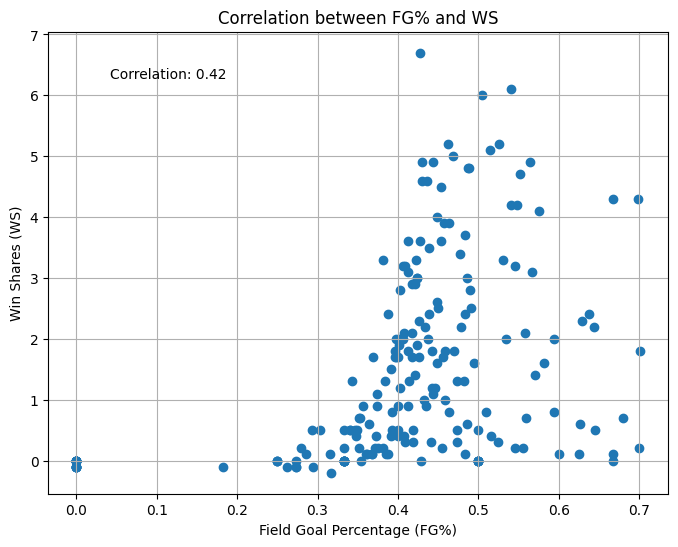

Correlation coefficient between FG% and WS: 0.42


In [36]:
# Calculate the correlation coefficient between FG% and WS
correlation = acc_players_2324['FG%'].corr(acc_players_2324['WS'])

# Create a scatter plot of FG% vs. WS
plt.figure(figsize=(8, 6))
plt.scatter(acc_players_2324['FG%'], acc_players_2324['WS'])
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.title('Correlation between FG% and WS')
plt.grid(True)

# Display the correlation coefficient on the plot
plt.text(0.1, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

plt.show()

print(f"Correlation coefficient between FG% and WS: {correlation:.2f}")